In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [53]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
data.shape

(150, 6)

In [56]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [57]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [58]:
type(data)



pandas.core.frame.DataFrame

In [59]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [60]:
type(data)

pandas.core.frame.DataFrame

In [61]:
X = data.drop('Species',axis = 1)
Y = data.Species

<Axes: >

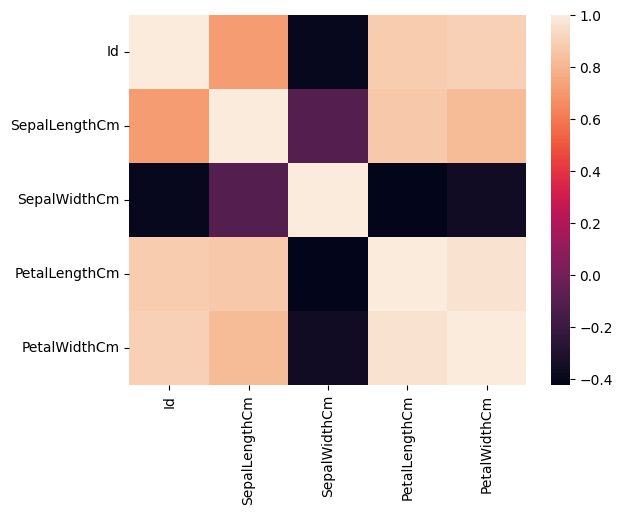

In [62]:
corr = data.corr()
sns.heatmap(corr)

In [63]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [64]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


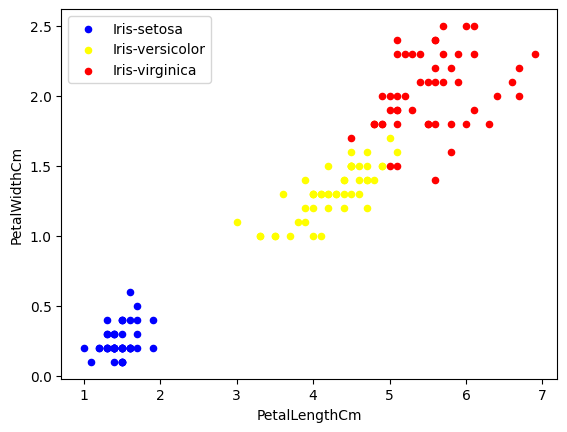

In [65]:
fig = data[data.Species == 'Iris-setosa'].plot(kind = 'scatter' , x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue' , label = "Iris-setosa")
fig = data[data.Species =='Iris-versicolor'].plot(kind = 'scatter' , x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Yellow' , label = "Iris-versicolor", ax = fig)
fig = data[data.Species =='Iris-virginica'].plot(kind = 'scatter' , x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'Red' , label = "Iris-virginica",ax = fig)
fig.set_xlabel = "Petal length in Cm"
fig.set_ylabel = "Petal width in Cm"
plt.show()

In [66]:
data.shape

(150, 6)

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4,train_size = 0.3)

In [68]:
model = LogisticRegression()

In [69]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
train_prediction = model.predict(X_train)

In [71]:
# Logistic Regression for Both Test and Train

In [72]:
train_accuracy = accuracy_score(Y_train,train_prediction)
print('The train accuracy of the Logistic Regression is', 100*train_accuracy,"%")

The train accuracy of the Logistic Regression is 100.0 %


In [73]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,test_prediction)
print('The test accuracy of the Logistic Regression ', 100*test_accuracy,"%")

The test accuracy of the Logistic Regression  100.0 %


In [74]:
# using Decision Tree Classifier

In [75]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is', 100*accuracy_score(prediction,Y_test),"%")

The accuracy of the Decision Tree is 99.04761904761905 %


In [76]:
# saving the model
import pickle

In [77]:
filename = "Iris_trained_model.sav"
pickle.dump(model,open(filename,'wb'))